In [ ]:
import pandas as pd

In [ ]:
Bolly_rap = pd.read_csv("/content/Bolly_Rap_Features - Bolly_Rap_Features.csv")
Bolly_rap['labels'] = pd.Series([0 for x in range(len(Bolly_rap.index))], index=Bolly_rap.index)
Bolly_rap.shape

Ghazal = pd.read_csv("/content/Ghazal_Features - Ghazal_Features.csv")
Ghazal['labels'] = pd.Series([1 for x in range(len(Ghazal.index))], index=Ghazal.index)
Ghazal.shape

Garhwali = pd.read_csv("/content/Garhwali_featres.csv")
Garhwali['labels'] = pd.Series([2 for x in range(len(Garhwali.index))], index=Garhwali.index)
Garhwali.shape

bhajan = pd.read_csv("/content/bhajan_featres.csv")
bhajan['labels'] = pd.Series([3 for x in range(len(bhajan.index))], index=bhajan.index)
bhajan.shape

bolly_roman = pd.read_csv("/content/bollywood_romantic.csv")
bolly_roman['labels'] = pd.Series([4 for x in range(len(bolly_roman.index))], index=bolly_roman.index)
bolly_roman.shape

sufi = pd.read_csv("/content/sufi_featres.csv")
sufi['labels'] = pd.Series([5 for x in range(len(sufi.index))], index=sufi.index)
sufi.shape


bhojpuri = pd.read_csv("/content/bhojpuri_featres.csv")
bhojpuri['labels'] = pd.Series([6 for x in range(len(bhojpuri.index))], index=bhojpuri.index)

In [ ]:
Bolly_rap.shape

(100, 14)

In [ ]:
frame = pd.concat([Bolly_rap, Ghazal, Garhwali, bhajan, bolly_roman, sufi, bhojpuri], ignore_index=True)

In [ ]:
final = frame.drop("Unnamed: 0", axis=1)

In [ ]:
final.head(600)
final.shape

(596, 14)

In [ ]:
final.to_csv("all_features.csv")

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

In [ ]:
X = final.drop(["Song_Name"], axis=1)
y = final.labels

In [ ]:
clf = svm.SVC(kernel='rbf', C=1)
scores = cross_val_score(clf, X, y, cv=5)

In [ ]:
!pip install --upgrade "mxnet<2.0.0"
!pip install autogluon

     |████████████████████████████████| 55.0MB 76kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


     |████████████████████████████████| 624kB 4.2MB/s 
     |████████████████████████████████| 819kB 9.1MB/s 
     |████████████████████████████████| 215kB 17.2MB/s 
     |████████████████████████████████| 112kB 18.6MB/s 
     |████████████████████████████████| 2.6MB 17.4MB/s 
     |████████████████████████████████| 675kB 34.2MB/s 
     |████████████████████████████████| 66.3MB 52kB/s 
     |████████████████████████████████| 28.6MB 135kB/s 
     |████████████████████████████████| 133kB 46.1MB/s 
     |████████████████████████████████| 153kB 49.6MB/s 
     |████████████████████████████████| 102kB 10.4MB/s 
     |████████████████████████████████| 890kB 44.7MB/s 
     |████████████████████████████████| 2.1MB 37.5MB/s 
     |████████████████████████████████| 1.8MB 41.2MB/s 
     |████████████████████████████████| 962kB 41.6MB/s 
     |████████████████████████████████| 71kB 8.1MB/s 
     |████████████████████████████████| 61kB 6.5MB/s 
     |████████████████████████████████| 71kB 8.6MB/s 
 

In [ ]:
!pip install -U ipykernel

     |████████████████████████████████| 122kB 5.6MB/s 
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.4.2 which is incompatible.
  Found existing installation: ipykernel 4.10.1
    Uninstalling ipykernel-4.10.1:
      Successfully uninstalled ipykernel-4.10.1


In [ ]:
from autogluon import TabularPrediction as task

In [ ]:
gbm_options = {  
    'num_boost_round': 100,  
    'num_leaves': ag.space.Int(lower=26, upper=66, default=36),  
}

hyperparameters = {  
                   'GBM': gbm_options,  
                  }

In [ ]:
predictor = task.fit(train_data=X, label="labels")

No output_directory specified. Models will be saved in: AutogluonModels/ag-20201111_084923/
Beginning AutoGluon training ...
AutoGluon will save models to AutogluonModels/ag-20201111_084923/
AutoGluon Version:  0.0.14
Train Data Rows:    596
Train Data Columns: 12
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	7 unique label values:  [0, 1, 2, 3, 4, 5, 6]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Train Data Class Count: 7
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12583.24 MB
	Train Data (Original)  Memory Usage: 0.06 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually

# NEURAL NETWORK

In [1]:
import pandas as pd

In [ ]:
data = pd.read_csv("all_features.csv")

In [ ]:
data.head()

In [ ]:
X = data.drop(["labels", "Unnamed: 0", "Song_Name"], axis=1)
X.shape

In [ ]:
from sklearn import preprocessing
X = preprocessing.scale(X)

In [ ]:
y = data["labels"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
import lightgbm as lgb
clf = lgb.LGBMClassifier(boosting_type='gbdt',
                          learning_rate=0.1)
clf.fit(X_train, y_train)

In [ ]:
# predict the results
y_pred=clf.predict(X_test)
print(y_pred)
print(y_test)

In [ ]:
# view accuracy
from sklearn.metrics import accuracy_score, classification_report
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

In [ ]:
import pickle
filename = 'Best_GBM.pkl'
pickle.dump(clf.fit, open(filename, 'wb'))

# Little Visualisation

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.model_selection import train_test_split

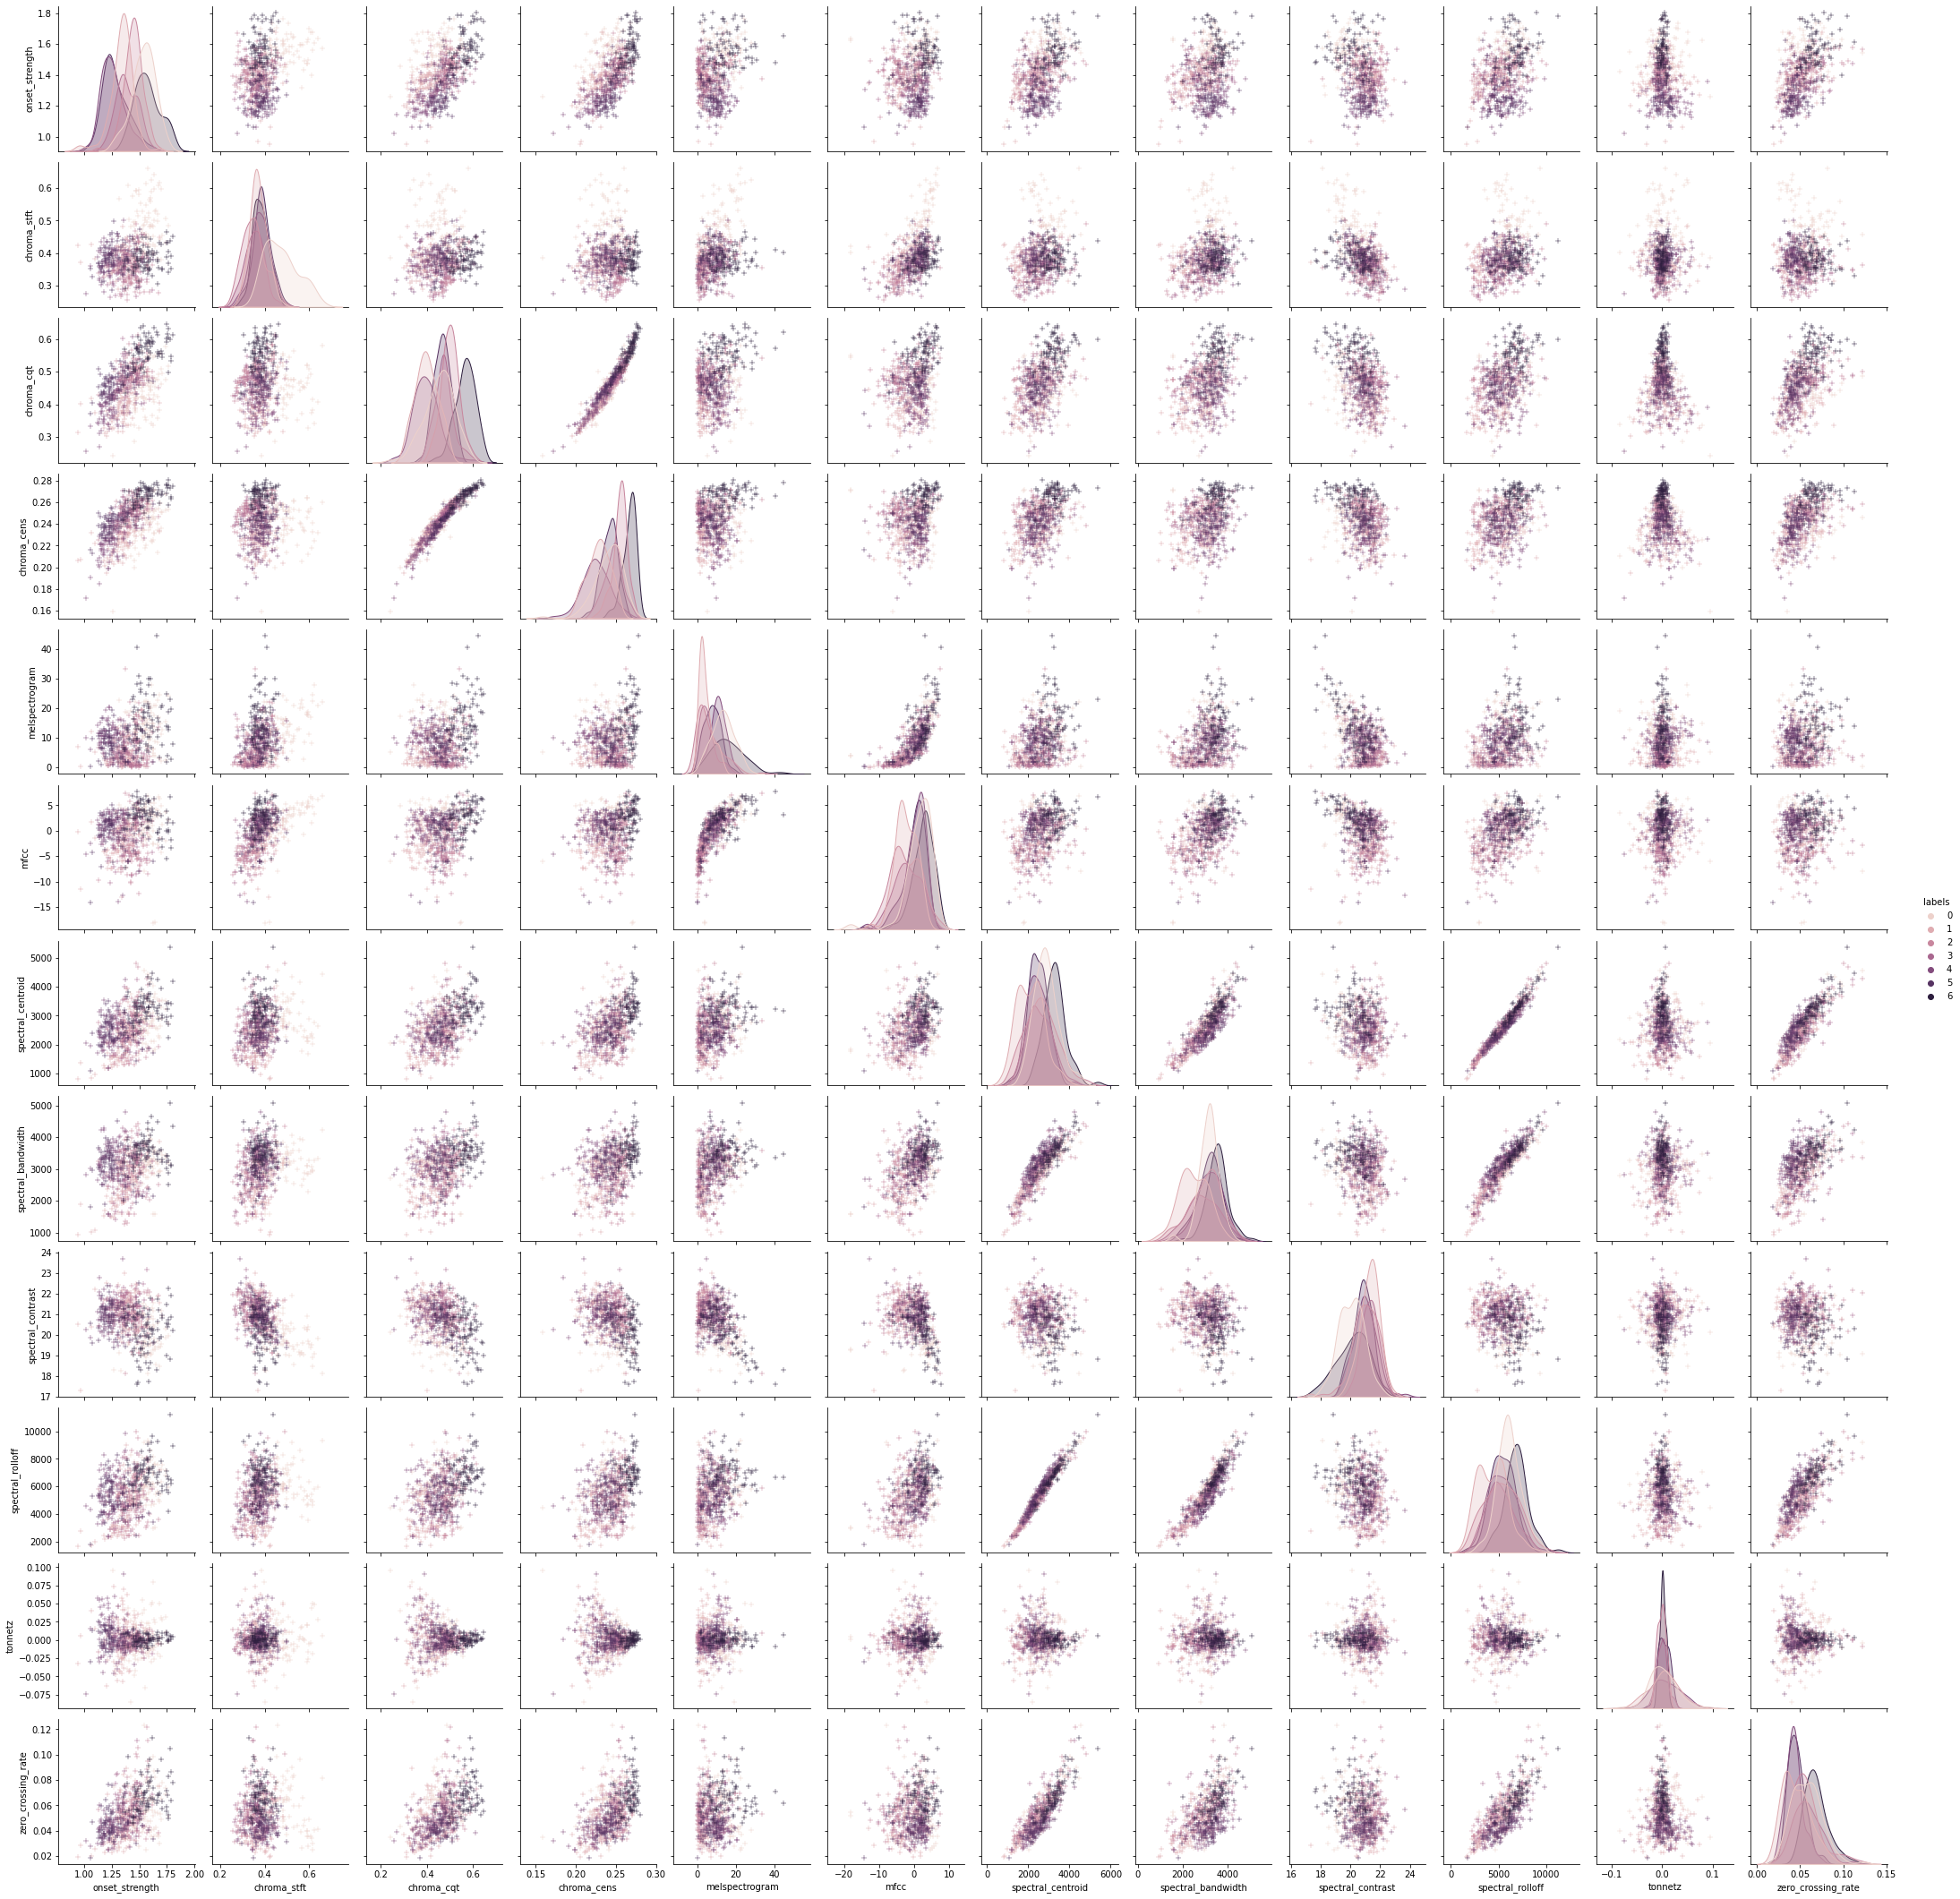

In [ ]:
tmp = X
g = sns.pairplot(tmp, hue='labels', markers='+')
plt.show()

In [ ]:
g = sns.violinplot(y='labels', x='chroma_stft', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='labels', x='mfcc', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='labels', x='spectral_contrast', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='labels', x='spectral_rolloff', data=data, inner='quartile')
plt.show()

# KEras

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras import models
from keras import layers
from keras.utils import to_categorical

network = models.Sequential()
network.add(layers.Dense(512, activation='sigmoid', input_shape=(12,)))
network.add(layers.Dense(256, activation='sigmoid'))
network.add(layers.Dense(128, activation='sigmoid'))
network.add(layers.Dense(7, activation='softmax'))

network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

network.fit(X_train, train_labels, epochs=50, batch_size=40)

In [ ]:
import pickle
filename = 'Best_NN.pkl'
pickle.dump(clf.fit, open(filename, 'wb'))